# importing libraries

In [25]:
# Use this cell to regroup all your imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import make_scorer, mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


# Loading dataframes

In [48]:
df_test = pd.read_csv("data/test.csv")
df_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [43]:
df_train = pd.read_csv("data/train.csv")
df_test = pd.read_csv("data/test.csv")

df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)
df_train['YrSold'] = df_train['YrSold'].astype(str)
df_train['MoSold'] = df_train['MoSold'].astype(str)

df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)
df_test['YrSold'] = df_test['YrSold'].astype(str)
df_test['MoSold'] = df_test['MoSold'].astype(str)

## Removing outliers before definining X and y

In [3]:
df_train.drop(df_train[(df_train["OverallQual"] == 10) & (df_train["SalePrice"] <=250000)].index , inplace = True)

df_train.drop(df_train[df_train["LotFrontage"] >250].index , inplace = True)

df_train.drop(df_train[(df_train["GarageArea"] > 1200 ) & (df_train["SalePrice"] <= 300000)].index , inplace = True)

df_train.drop(df_train[ (df_train["LotArea"] >= 100000)].index , inplace = True)

outliers_1 = (df_train["YearBuilt"] < 1900) & (df_train["SalePrice"] >= 400000)
df_train.drop(df_train[outliers_1].index , inplace = True)

outliers_2 = (df_train["1stFlrSF"] > 2700)
df_train.drop(df_train[outliers_2].index , inplace = True)


# Loading X/y

In [4]:
X = df_train.drop(columns="SalePrice").copy()
y= np.log1p(df_train["SalePrice"])

# Selecting initial features

In [5]:
X.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## dropping category columns with more than 7 unique values

In [6]:
counter = -1
to_drop = []
for column in X:
    dtype = X[column].dtype
    n_unqiue = len(X[column].unique())
    counter= counter+1 
    if dtype == "object" and n_unqiue>7:
        to_drop.append(counter)

X.drop(X.columns[to_drop], axis=1,inplace=True)
X.shape

(1447, 71)

In [7]:
#forgot to drop id
#X.drop(columns="Id",inplace=True)
X.drop(columns="BldgType",inplace=True)


## Looking at correlation heatmap of numerical variables

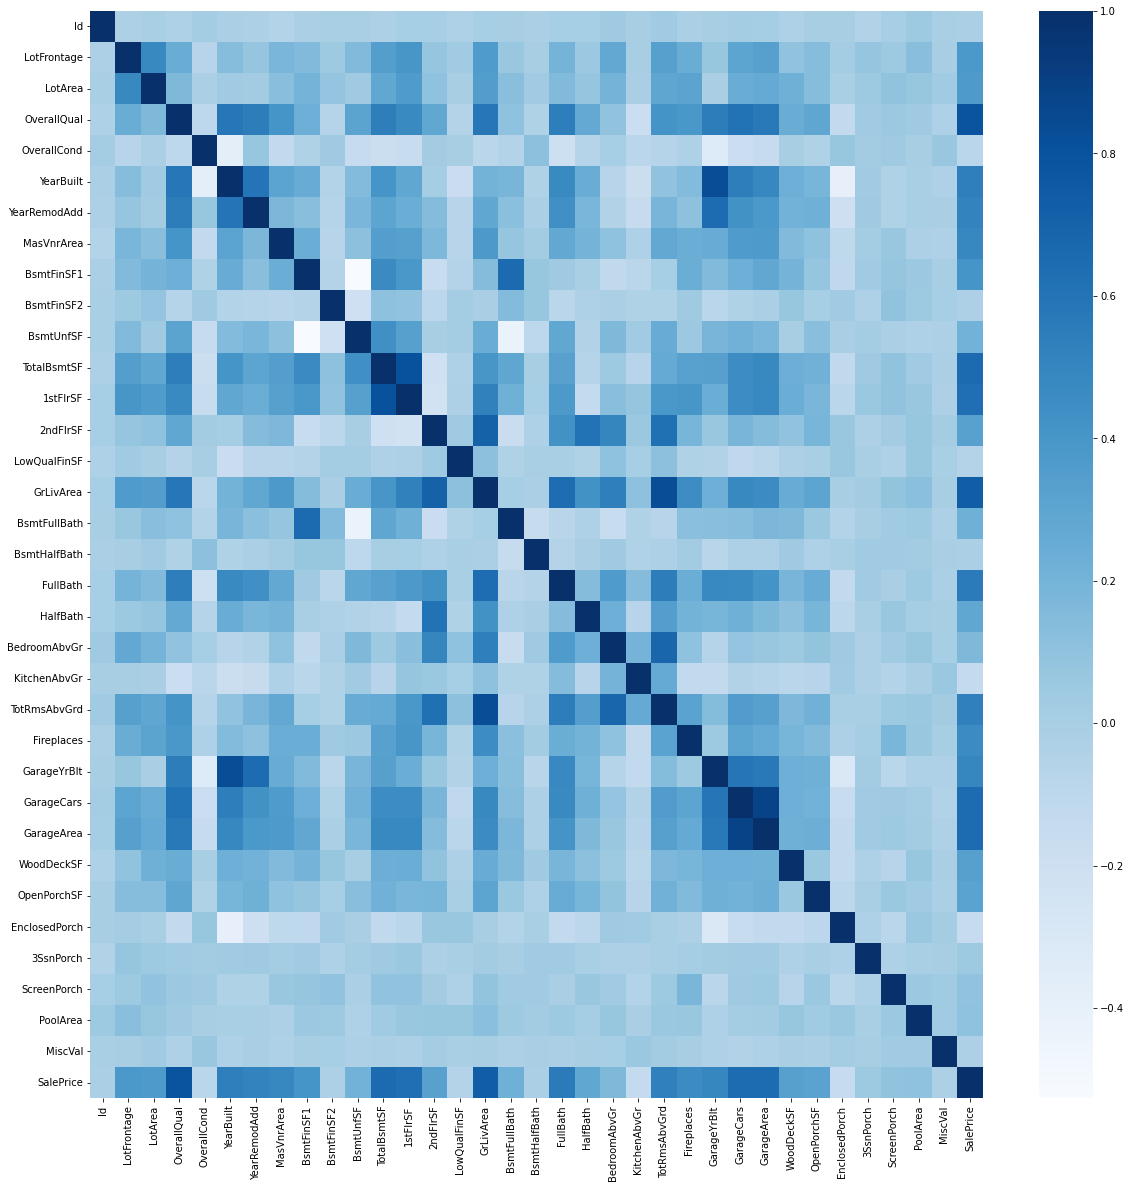

In [8]:
plt.figure(figsize= (20 , 20))
sns.heatmap(df_train.corr(),cmap="Blues");

## Looking at missing values

In [9]:
pd.set_option('display.max_rows', 100)

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1447 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1447 non-null   int64  
 1   MSZoning       1447 non-null   object 
 2   LotFrontage    1194 non-null   float64
 3   LotArea        1447 non-null   int64  
 4   Street         1447 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1447 non-null   object 
 7   LandContour    1447 non-null   object 
 8   Utilities      1447 non-null   object 
 9   LotConfig      1447 non-null   object 
 10  LandSlope      1447 non-null   object 
 11  OverallQual    1447 non-null   int64  
 12  OverallCond    1447 non-null   int64  
 13  YearBuilt      1447 non-null   int64  
 14  YearRemodAdd   1447 non-null   int64  
 15  RoofStyle      1447 non-null   object 
 16  RoofMatl       1447 non-null   object 
 17  MasVnrType     1439 non-null   object 
 18  MasVnrAr

# transforming variables

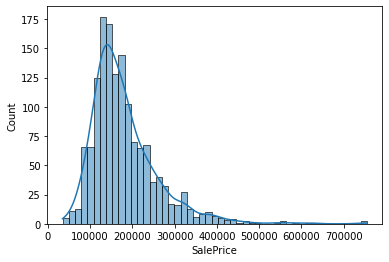

In [11]:
sns.histplot(df_train.SalePrice , kde = True);
#conclude from this and notebook that saleprice needs to be transformed with log (not normally distributed)

In [12]:
ordinal_columns = ["OverallQual", "OverallCond", "ExterQual", "ExterCond", "BsmtQual", "BsmtCond", "BsmtFinType1", "BsmtFinType2", "HeatingQC", "KitchenQual", "FireplaceQu", "GarageFinish", "GarageQual", "GarageCond", "PoolQC"]
nominal_columns = ["MSSubClass", "MSZoning", "Street", "Alley", "LotShape", "LandContour", "Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", "Condition2", "HouseStyle", "RoofStyle", "RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "Foundation", "BsmtExposure", "Heating", "CentralAir", "Electrical", "Functional", "GarageType", "PavedDrive", "Fence", "MiscFeature", "SaleType", "SaleCondition"]
meaningfull_missing = ["PoolQC","Alley","Fence","FireplaceQu","MiscFeature"]
non_meaningfull_missing = ["LotFrontage","GarageFinish","GarageQual","GarageCond","GarageYrBlt","GarageType","BsmtExposure","BsmtCond","BsmtQual","BsmtFinType2","MasVnrType","MasVnrArea","MSZoning","BsmtFullBath","BsmtHalfBath",
"Functional","Utilities","GarageArea","GarageCars","Electrical","KitchenQual","TotalBsmtSF","BsmtUnfSF","BsmtFinSF2","BsmtFinSF1","Exterior2nd","Exterior1st","SaleType"]

In [13]:
list_of_columns = list(X.columns)

In [14]:
ordinal_columns = [x for x in ordinal_columns if x in list_of_columns]
nominal_columns = [x for x in nominal_columns if x in list_of_columns]
meaningfull_missing = [x for x in meaningfull_missing if x in list_of_columns]
non_meaningfull_missing = [x for x in non_meaningfull_missing if x in list_of_columns]

In [15]:
non_col =[x for x in list_of_columns if (x not in meaningfull_missing) and (x not in non_meaningfull_missing)]

In [16]:
non_col

['Id',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'LotConfig',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtFinType1',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'YrSold',
 'SaleCondition']

In [17]:
impute_meaningfull_missing = SimpleImputer(strategy='constant',missing_values=np.nan, fill_value="not_present")
impute_non_meaningfull_missing = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
ordinal_transformer = OrdinalEncoder(handle_unknown="use_encoded_value", unknown_value=np.nan)
nominal_transformer = OneHotEncoder(sparse=False,handle_unknown="ignore")

In [18]:
pipe_1 = ColumnTransformer([
    
    ('ordinal_columns', ordinal_transformer, ordinal_columns),
    ('nominal_columns', nominal_transformer, nominal_columns)], 
    remainder='passthrough')

def array_to_df(array_name):
    return pd.DataFrame(array_name,columns=meaningfull_missing +non_meaningfull_missing+non_col)


In [19]:
pipe_2 = ColumnTransformer([
    ('meaningfull_missing', impute_meaningfull_missing, meaningfull_missing),
    ('non_meaningfull_missing', impute_non_meaningfull_missing, non_meaningfull_missing)], 
    remainder='passthrough')

pipe = Pipeline([("2", pipe_2),("left_over_missing",SimpleImputer(strategy="most_frequent")),("function_transformer",FunctionTransformer(array_to_df)),("1",pipe_1),("left_over_missing_final",SimpleImputer(strategy="most_frequent"))]) 

# Scoring and testing

In [21]:
def rmsle(y, y_pred):
    return -np.sqrt(mean_squared_log_error(y, y_pred))

scoring = make_scorer(rmsle, greater_is_better=False)

In [22]:
def rmsle_neg(real, predicted):
    p = np.log(predicted+1)
    r = np.log(real+1)
    sum = ((p - r)**2).sum()
    return ((sum/len(predicted))**0.5) * -1
rmsle_neg_score = make_scorer(rmsle_neg, greater_is_better = True)

In [31]:
test_pipe=make_pipeline(pipe, RandomForestRegressor())
test_pipe.fit(X,y)
test_pipe.predict(df_test)

array([11.72352502, 11.91073449, 12.11799646, ..., 11.95298005,
       11.6323902 , 12.35532522])

In [26]:
# Cross-validate Pipeline
gdb_score = cross_val_score(test_pipe, X, y,n_jobs=1, cv=5, scoring=rmsle_neg_score).mean()
gdb_score

-0.010685157338506354

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {}
grid = GridSearchCV(estimator, param_grid, scoring=scoring, n_jobs=-1, cv=5)
grid.fit(X, y);

# 🏅FINAL SUBMISSION (submit at least 30 min before Recap)

Discover your real test score by submitting on Kaggle! 

👉 Write down your test score on the [result spreadsheet here](https://docs.google.com/spreadsheets/d/1ZEBKwa_k1Ytb0WCOh-Nopq3eaezwBNu1SAqKXEXRguc/edit#gid=0) (pick the correct batch!)

In [35]:
submission = pd.DataFrame(df_test["Id"].copy())

In [40]:
submission["SalePrice"] = np.exp(test_pipe.predict(df_test))

In [39]:
submission.to_csv("houses_kaggle.csv",header=True,index=False)

In [41]:
submission

,Id,SalePrice
0,1461,123441.793817
1,1462,148855.972744
2,1463,183138.221620
3,1464,179671.124268
4,1465,191580.608666
...,...,...
1454,2915,84603.337656
1455,2916,85258.827135
1456,2917,155279.197914
1457,2918,112689.350800
